# ODE initial value problems

This notebook will explore how oridinary differential equations may be solved using Julia and the DifferentialEquations.jl package. We will specifically focus on intial value problems; boundary value problems will be examined in another notebook. 

In [23]:
#using Pkg
#Pkg.add( "DifferentialEquations" )

In [2]:
using DifferentialEquations

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1260


Lets solve the equation
$$
\frac{d u}{d t} = p u
$$
on the interval $t \in [0,1]$ with the initial condition $u(0)=u_0$ where $p$ is a constant. The exact solution is $u(t)=u_0 e^{p t}$.

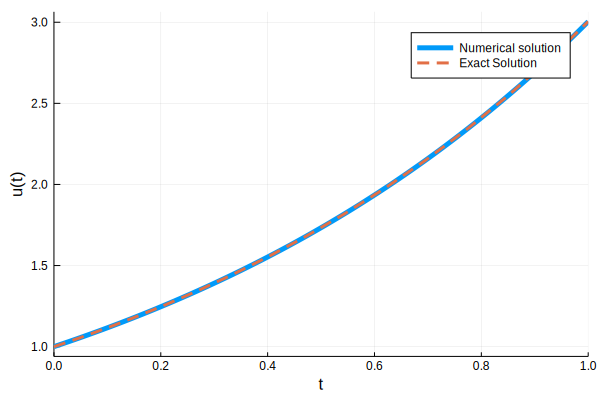

In [20]:
function simple_function!(du, u, p, t)
    du[1] = p[1] * u[1]
end

p = [1.1]
u0 = [1.0]
tspan = (0.0,1.0)
prob = ODEProblem(simple_function!,u0,tspan,p)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

using Plots
plot(sol,linewidth=5, xaxis="t",yaxis="u(t)",label="Numerical solution") # legend=false
plot!(sol.t, t->u0[1]*exp(p[1]*t),lw=3,ls=:dash,label="Exact Solution")

Here Tsit5() is the standard non-stiff solver. Now lets solve a system of ODEs such as the lorenz equations
$$
\begin{align}
\frac{dx}{dt} &= \sigma (y-x), \\
\frac{dy}{dt} &= x (\rho-z) - y, \\
\frac{dz}{dt} &= xy - \sigma z.
\end{align}
$$
This simplified model for atmospheric convection has chaotic solutions when the parameters have the values $\sigma = 10$, $\rho = 28$ and $\beta = 8/3$. We choose the initial conditions $x(0)=1$, $y(0)=0$ and $z(0)=0$.

In [21]:
function lorenz!(du,u,p,t)
  x,y,z = u
  σ,ρ,β = p
  du[1] = dx = σ*(y-x)
  du[2] = dy = x*(ρ-z) - y
  du[3] = dz = x*y - β*z
end

lorenz! (generic function with 1 method)

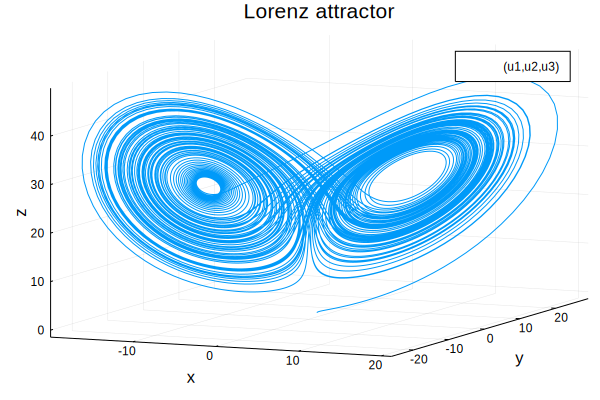

In [22]:
p = [10.0,28.0,8/3]
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz!,u0,tspan,p)
sol = solve(prob)
plot(sol,vars=(1,2,3), title="Lorenz attractor", xaxis="x", yaxis="y",
     zaxis="z")

We can also plot the time series for each variable individually.

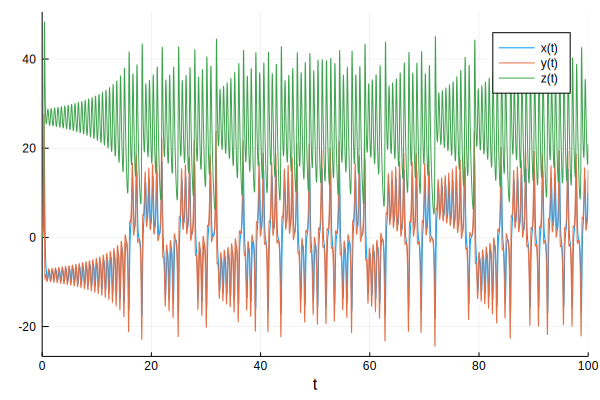

In [25]:
plot(sol, vars=(0,1), label="x(t)")
plot!(sol, vars=(0,2), label="y(t)")
plot!(sol, vars=(0,3), label="z(t)")